# Loader + KDE

In [1]:
import sys
sys.path.append('../codes')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import pylab as plt

from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

### 1. Load justin beer data

Filtering parameters taken from https://www.dropbox.com/home/Meta_clustering/ms2lda/large_study/r/config?preview=config_beer_pos_3.yml for the beer data.
- rt_start: 3*60
- rt_end: 21*60
- min_MS1_intensity : 1E5 or 2E5 should do a decent job on Polyomics Q-Exactive data
- min_MS2_intensity: 5000

In [5]:
min_ms1_intensity = 2E5
min_ms2_intensity = 5000
min_rt = 3*60
max_rt = 21*60

Load mzML files

In [6]:
ds = DataSource()

In [7]:
mzml_path = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\Data\\FourBeers_mzML_files\\POS'
ds.load_data(mzml_path)

INFO:DataGenerator:Loading Beer_1_T10_POS.mzML
INFO:DataGenerator:Loading Beer_2_T10_POS.mzML
INFO:DataGenerator:Loading Beer_3_T10_POS.mzML
INFO:DataGenerator:Loading Beer_QC_T10_POS.mzML


Get all the filenames we've loaded

In [8]:
ds.file_spectra.keys()

dict_keys(['Beer_1_T10_POS.mzML', 'Beer_2_T10_POS.mzML', 'Beer_3_T10_POS.mzML', 'Beer_QC_T10_POS.mzML'])

Get various values for beer1pos

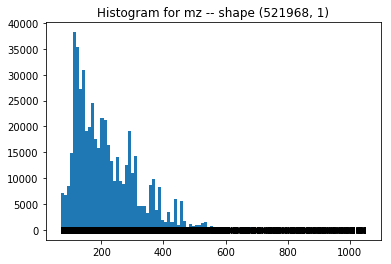

DEBUG:DataGenerator:[[ 78.955666]
 [ 94.929596]
 [ 96.92774 ]
 ...
 [304.24817 ]
 [305.25162 ]
 [391.2841  ]]


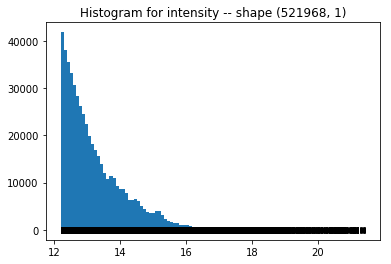

DEBUG:DataGenerator:[[12.671217]
 [15.246603]
 [13.470962]
 ...
 [14.060248]
 [12.412741]
 [12.463533]]


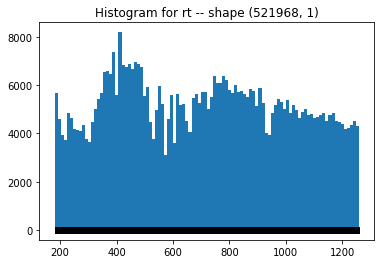

DEBUG:DataGenerator:[[ 180.059]
 [ 180.059]
 [ 180.059]
 ...
 [1259.76 ]
 [1259.76 ]
 [1259.76 ]]


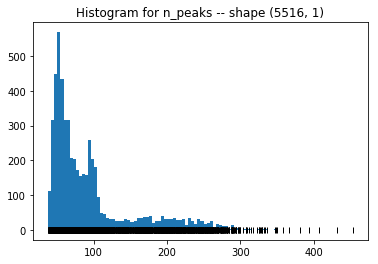

DEBUG:DataGenerator:[[70]
 [69]
 [72]
 ...
 [50]
 [49]
 [51]]


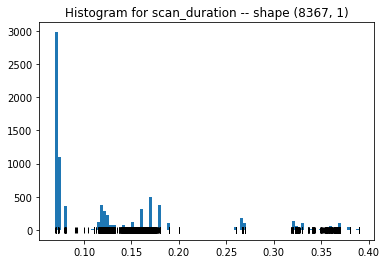

DEBUG:DataGenerator:[[0.354924]
 [0.1453  ]
 [0.13778 ]
 ...
 [0.19    ]
 [0.07    ]
 [0.07    ]]


In [10]:
data_types = [MZ, INTENSITY, RT, N_PEAKS, SCAN_DURATION]
filename = None
ms_level = 1

for data_type in data_types:
    X = ds.get_data(data_type, filename, ms_level, min_intensity=min_ms1_intensity, min_rt=min_rt, max_rt=max_rt)
    if data_type == INTENSITY:
        ds.plot_histogram(np.log(X), data_type)
    else:
        ds.plot_histogram(X, data_type)        

### 2. Train ms1 densities

In [11]:
filename = None
ms_level = 1

In [12]:
densities = DensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)

DEBUG:DataGenerator:Retrieving mz values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>
DEBUG:DataGenerator:Retrieved (521968, 1) values
DEBUG:DataGenerator:Fitting kde on mz


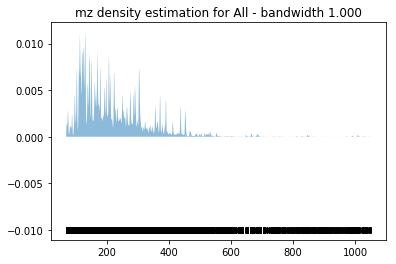

DEBUG:DataGenerator:Retrieving intensity values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>
DEBUG:DataGenerator:Retrieved (521968, 1) values
DEBUG:DataGenerator:Fitting kde on intensity


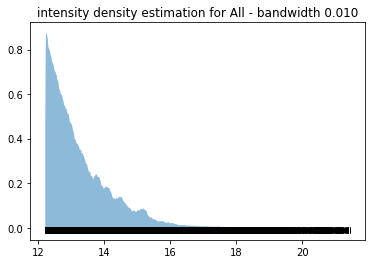

DEBUG:DataGenerator:Retrieving rt values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>
DEBUG:DataGenerator:Retrieved (521968, 1) values
DEBUG:DataGenerator:Fitting kde on rt


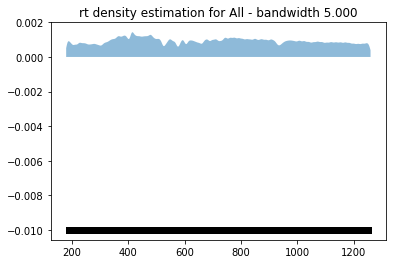

DEBUG:DataGenerator:Retrieving n_peaks values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>
DEBUG:DataGenerator:Retrieved (5516, 1) values
DEBUG:DataGenerator:Fitting kde on n_peaks


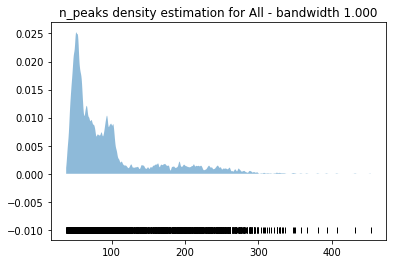

DEBUG:DataGenerator:Retrieving scan_duration values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>
DEBUG:DataGenerator:Retrieved (8367, 1) values
DEBUG:DataGenerator:Fitting kde on scan_duration


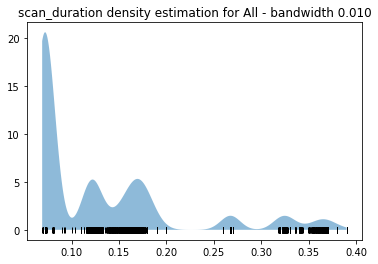

In [13]:
densities.kde(ds, filename, ms_level, bandwidth_mz=1.0, bandwidth_intensity=0.01, 
              bandwidth_rt=5.0, bandwidth_n_peaks=1.0, bandwidth_scan_durations=0.01)

In [14]:
densities.sample(ms_level, 10)

array([[ 288.88266053,   12.26667409,  319.19347768],
       [ 234.50282143,   13.20711269, 1181.32045009],
       [ 125.95574603,   13.36823103,  465.62887678],
       [ 150.8319421 ,   13.26629072,  912.55709098],
       [ 114.16387956,   12.42432133,  986.63562812],
       [ 116.01654083,   12.48934119, 1248.90206608],
       [ 226.31238645,   12.38561661, 1178.54904831],
       [ 110.66704642,   13.02978328,  289.74181905],
       [  90.20904902,   12.40116164, 1196.28005072],
       [ 171.22373556,   12.60219113,  507.19893458]])

In [15]:
densities.n_peaks(ms_level, 10)

array([[ 91.13931444],
       [ 56.25858876],
       [ 93.57047672],
       [ 44.36692881],
       [ 85.70135852],
       [ 55.3275491 ],
       [ 54.61718779],
       [235.96086362],
       [ 55.05910279],
       [ 66.76402775]])

In [16]:
densities.scan_durations(ms_level, 10)

array([[0.1174141 ],
       [0.12575305],
       [0.16470099],
       [0.14552451],
       [0.1777489 ],
       [0.07774979],
       [0.19041705],
       [0.07836717],
       [0.0747207 ],
       [0.17204417]])

### 3. Train ms2 densities

In [17]:
ms_level = 2

DEBUG:DataGenerator:Retrieving mz values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>
DEBUG:DataGenerator:Retrieved (280106, 1) values
DEBUG:DataGenerator:Fitting kde on mz


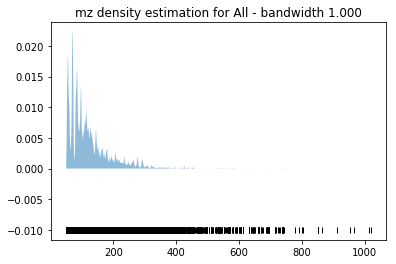

DEBUG:DataGenerator:Retrieving intensity values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>
DEBUG:DataGenerator:Retrieved (280106, 1) values
DEBUG:DataGenerator:Fitting kde on intensity


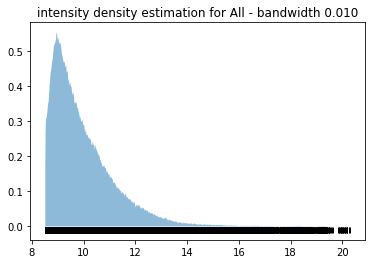

DEBUG:DataGenerator:Retrieving rt values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>
DEBUG:DataGenerator:Retrieved (280106, 1) values
DEBUG:DataGenerator:Fitting kde on rt


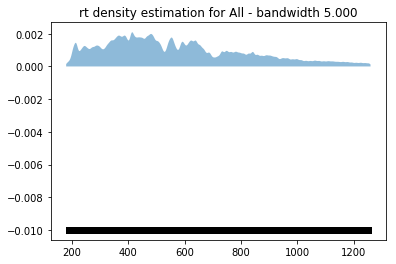

DEBUG:DataGenerator:Retrieving n_peaks values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>
DEBUG:DataGenerator:Retrieved (21373, 1) values
DEBUG:DataGenerator:Fitting kde on n_peaks


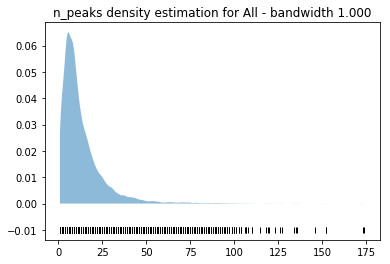

DEBUG:DataGenerator:Retrieving scan_duration values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>
DEBUG:DataGenerator:Retrieved (26558, 1) values
DEBUG:DataGenerator:Fitting kde on scan_duration


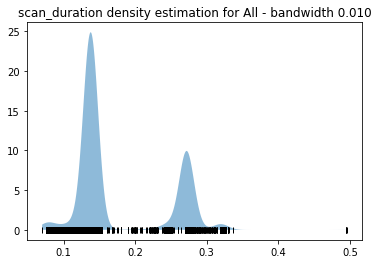

In [18]:
densities.kde(ds, filename, ms_level, bandwidth_mz=1.0, bandwidth_intensity=0.01, 
              bandwidth_rt=5.0, bandwidth_n_peaks=1.0, bandwidth_scan_durations=0.01)

### 4. Alternative KDE where we fit the m/z and intensity together

In [19]:
filename = 'Beer_1_T10_POS.mzML'

DEBUG:DataGenerator:Retrieving mz_intensity values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>
DEBUG:DataGenerator:Plotting for mz_intensity not implemented
DEBUG:DataGenerator:Retrieving rt values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>


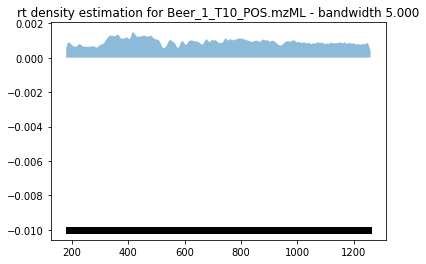

DEBUG:DataGenerator:Retrieving n_peaks values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>


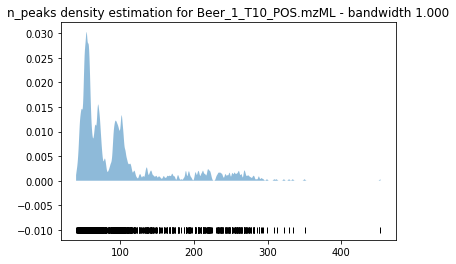

DEBUG:DataGenerator:Retrieving scan_duration values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>


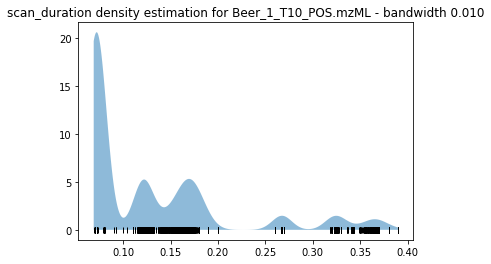

DEBUG:DataGenerator:Retrieving mz_intensity values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>
DEBUG:DataGenerator:Plotting for mz_intensity not implemented
DEBUG:DataGenerator:Retrieving rt values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>


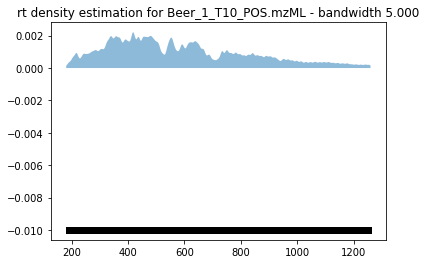

DEBUG:DataGenerator:Retrieving n_peaks values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>


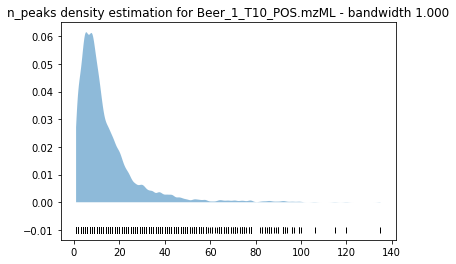

DEBUG:DataGenerator:Retrieving scan_duration values from <VMSfunctions.DataGenerator.DataSource object at 0x000001D70E30BE48>


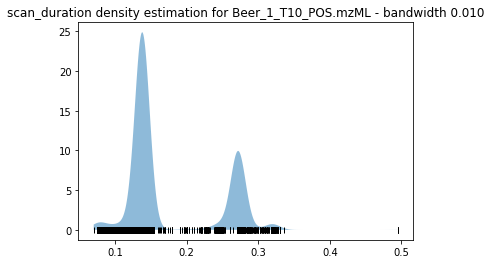

In [20]:
densities = PeakDensityEstimator(min_ms1_intensity, min_ms2_intensity, min_rt, max_rt, plot=True)
densities.kde(ds, filename, 1, bandwidth_mz_intensity=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
densities.kde(ds, filename, 2, bandwidth_mz_intensity=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)

In [21]:
densities.sample(1, 10)

array([[ 190.68575632,   13.77357553,  441.55550726],
       [ 456.14626542,   12.80418819, 1089.80296561],
       [ 285.70830169,   12.74368639,  350.88879546],
       [ 164.18004728,   12.30457777, 1128.60991213],
       [ 144.22622031,   13.7318723 ,  884.68370002],
       [ 140.0456745 ,   12.77627323,  459.10306355],
       [ 295.00287738,   12.1852024 ,  738.42485318],
       [ 172.25348459,   11.73890102,  765.68155762],
       [ 158.41375509,   11.86777376,  643.7289616 ],
       [ 506.64785318,   12.99690548,  495.53301797]])

In [22]:
densities.n_peaks(1, 10)

array([[ 95.97136079],
       [ 87.1445317 ],
       [ 50.74101601],
       [ 47.33404509],
       [ 68.06977136],
       [ 69.01040604],
       [ 89.37374691],
       [ 52.03349678],
       [ 72.86835504],
       [107.07393088]])

In [23]:
densities.scan_durations(1, 10)

array([[0.32372507],
       [0.17552996],
       [0.15606541],
       [0.08336591],
       [0.16241055],
       [0.08552776],
       [0.15612807],
       [0.07692614],
       [0.11596293],
       [0.10835159]])

In [24]:
densities.sample(2, 10)

array([[ 123.50240179,   11.87253857,  245.51313643],
       [  97.53235142,   10.31443108,  334.08882257],
       [  53.13531748,   10.44420948,  642.81341719],
       [ 194.8682199 ,    6.8015789 ,  899.7085878 ],
       [  91.73290303,    7.42897949, 1073.16831278],
       [  70.43211811,   11.74583687,  927.08469881],
       [  69.92823256,   10.43470124,  588.07388103],
       [  67.74684836,    7.83100745,  930.02438511],
       [ 129.50360254,   13.08671927,  745.53648505],
       [ 110.57785011,    9.11292843,  358.33506774]])

In [25]:
densities.n_peaks(2, 10)

array([[48.01881972],
       [ 4.12414695],
       [18.70673729],
       [23.76903875],
       [10.89102218],
       [10.76611608],
       [ 6.14729327],
       [16.78095548],
       [69.25390529],
       [ 8.94361388]])

In [26]:
densities.scan_durations(2, 10)

array([[0.14729637],
       [0.27359206],
       [0.12347661],
       [0.12281418],
       [0.14547606],
       [0.2543947 ],
       [0.25539892],
       [0.12500875],
       [0.27227681],
       [0.27610997]])

### 5. Generate some synthetic peaks

In [27]:
ps = PeakSampler(densities)

In [28]:
save_obj(ps, '../models/peak_sampler_4_beers.p')

In [29]:
ps = load_obj('../models/peak_sampler_4_beers.p')

In [31]:
ps.sample(ms_level=1, min_mz=100, max_mz=200, min_rt=100, max_rt=200, min_intensity=1e5)

[PeakSample mz=161.3661 rt=175.77 intensity=668744.81 ms_level=1,
 PeakSample mz=160.7797 rt=191.82 intensity=508627.12 ms_level=1,
 PeakSample mz=133.7116 rt=195.52 intensity=2107315.69 ms_level=1,
 PeakSample mz=141.3499 rt=185.84 intensity=3439312.08 ms_level=1,
 PeakSample mz=116.0102 rt=181.76 intensity=256377.74 ms_level=1,
 PeakSample mz=131.5446 rt=185.66 intensity=1214361.76 ms_level=1,
 PeakSample mz=173.3236 rt=178.07 intensity=2123493.22 ms_level=1,
 PeakSample mz=110.5581 rt=189.49 intensity=903285.67 ms_level=1,
 PeakSample mz=110.3264 rt=184.06 intensity=273776.21 ms_level=1,
 PeakSample mz=116.8987 rt=187.15 intensity=960757.30 ms_level=1,
 PeakSample mz=130.3798 rt=187.23 intensity=144985.33 ms_level=1,
 PeakSample mz=111.2845 rt=188.45 intensity=4041517.97 ms_level=1,
 PeakSample mz=190.8437 rt=183.63 intensity=1434730.32 ms_level=1,
 PeakSample mz=115.8779 rt=183.55 intensity=1132091.42 ms_level=1,
 PeakSample mz=199.3045 rt=180.58 intensity=3102511.70 ms_level=1,
 P

In [32]:
ps.sample(ms_level=1, n_peaks=10)

[PeakSample mz=145.8801 rt=1065.65 intensity=3875258.63 ms_level=1,
 PeakSample mz=280.2906 rt=837.63 intensity=337752.00 ms_level=1,
 PeakSample mz=393.1428 rt=206.51 intensity=1546250.24 ms_level=1,
 PeakSample mz=438.2103 rt=690.87 intensity=186751.75 ms_level=1,
 PeakSample mz=372.9727 rt=1174.45 intensity=710413.90 ms_level=1,
 PeakSample mz=305.7171 rt=1091.66 intensity=371158.47 ms_level=1,
 PeakSample mz=101.3847 rt=718.10 intensity=321495.16 ms_level=1,
 PeakSample mz=378.8669 rt=552.57 intensity=750954.87 ms_level=1,
 PeakSample mz=298.8017 rt=749.97 intensity=460484.55 ms_level=1,
 PeakSample mz=468.5244 rt=650.35 intensity=193878.38 ms_level=1]

In [33]:
ps.sample(ms_level=2)

[PeakSample mz=175.5689 rt=1220.07 intensity=70178.14 ms_level=2,
 PeakSample mz=214.3195 rt=321.37 intensity=4957.33 ms_level=2,
 PeakSample mz=91.4815 rt=267.58 intensity=2800.12 ms_level=2]

In [34]:
ps.sample(ms_level=2, n_peaks=10)

[PeakSample mz=54.4913 rt=309.15 intensity=36924.22 ms_level=2,
 PeakSample mz=207.9511 rt=685.62 intensity=94793.09 ms_level=2,
 PeakSample mz=143.0205 rt=979.84 intensity=2429.35 ms_level=2,
 PeakSample mz=57.3474 rt=290.71 intensity=3230.82 ms_level=2,
 PeakSample mz=89.2466 rt=370.29 intensity=69893.02 ms_level=2,
 PeakSample mz=212.3718 rt=630.68 intensity=3755.36 ms_level=2,
 PeakSample mz=72.1969 rt=1192.00 intensity=7508.23 ms_level=2,
 PeakSample mz=59.1984 rt=350.37 intensity=6136.77 ms_level=2,
 PeakSample mz=164.0853 rt=775.65 intensity=8012.68 ms_level=2,
 PeakSample mz=260.6381 rt=197.16 intensity=26024.11 ms_level=2]

### 6. Train on Justin's Urine Data

In [ ]:
# ds = DataSource(min_ms1_intensity=2E5, min_ms2_intensity=5000, min_rt=3*60, max_rt=21*60, min_sn=100)
# ds.load_data('C:\\Users\\joewa\\Work\\docs\\clms\\Urines100Study_mzml_files_peaklist\\mzml_files')

In [ ]:
# densities = PeakDensityEstimator()
# densities.kde(ds, 1, bandwidth_mz_int=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
# densities.kde(ds, 2, bandwidth_mz_int=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)

In [ ]:
# ps = PeakSampler(densities)
# save_obj(ps, '../models/peak_sampler_100_urines.p')

In [ ]:
# ps = load_obj('../models/peak_sampler_100_urines.p')

In [ ]:
# ps.sample(ms_level=1)

In [ ]:
# ps.sample(ms_level=2)